In this project you will also get a glimpse of:

Text preprocessing for NLP
(Stopwords removal, Lemmatization, part-of-speech tagging),

Sentiment analysis (vader sentiment)

Dimensionality reduction (pca+tsne)

Clustering (K-means)

Topic Modeling (LDA)
**bold text**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import time

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
import nltk
from nltk.corpus import stopwords
stoplist= stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
df= pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.columns= df.columns.str.replace(" ", "_")
df.head()
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
20328,1078,26.0,Beautiful fit!,"As a teacher, it's so great to be able to find...",5.0,1.0,23.0,General,Dresses,Dresses
20329,872,46.0,Comfy top,I bought the black and love it. i bought both ...,5.0,1.0,0.0,General,Tops,Knits
20330,836,46.0,Easy breezy summer top,I absolutely love this blouse! it's easily one...,5.0,1.0,4.0,General,Tops,Blouses
20331,1049,38.0,NaN,I would not recommend these pants if you have ...,2.0,0.0,3.0,General,Bottoms,Pants


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20333 entries, 0 to 20332
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing_ID              20333 non-null  int64  
 1   Age                      20332 non-null  float64
 2   Title                    17030 non-null  object 
 3   Review_Text              19602 non-null  object 
 4   Rating                   20332 non-null  float64
 5   Recommended_IND          20332 non-null  float64
 6   Positive_Feedback_Count  20332 non-null  float64
 7   Division_Name            20322 non-null  object 
 8   Department_Name          20322 non-null  object 
 9   Class_Name               20322 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [11]:
df.dropna(subset=['Review_Text'], inplace=True)
df.shape

(19602, 10)

In [12]:
# Review word count
df['rev_word_count']= df['Review_Text'].apply(lambda x: len(x.strip().split()))

# Unique word count
df['unique_word_count']= df['Review_Text'].apply(lambda x: len(set(str(x).split())))

In [13]:
# Bucketing Clothing ID's with 1 or 2 count

clothing_id_to_combine=[]
for val, cnt in df.Clothing_ID.value_counts().iteritems():
    # If that Clothing_ID is present less than 1%(~200) of the total data, club it into '000' (default) id
    if(cnt<200):
        clothing_id_to_combine.append(val)

print("# of clothing ID's clubbed: ",len(clothing_id_to_combine))

df['new_clothingID']= df.Clothing_ID.apply(lambda x: '000' if x in clothing_id_to_combine else x)
df.new_clothingID.value_counts(normalize=True)

<ipython-input-13-9b01c95158c4>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for val, cnt in df.Clothing_ID.value_counts().iteritems():


# of clothing ID's clubbed:  1028


000     0.603051
1078    0.044077
862     0.033262
1094    0.033058
1081    0.027038
829     0.024028
872     0.023875
1110    0.021018
868     0.018978
936     0.016427
867     0.015254
895     0.015203
1095    0.014284
850     0.014029
1080    0.013366
1059    0.012652
1077    0.012448
1086    0.012295
860     0.012193
863     0.012040
1083    0.010866
873     0.010560
Name: new_clothingID, dtype: float64

In [14]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [15]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

# Try it out!
vs= analyzer.polarity_scores("Vader sentiment looks interesting, I have high hopes!")
print(vs)

{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'compound': 0.6996}


In [16]:
df['review_sentiment']= [analyzer.polarity_scores(line)['compound'] for line in df['Review_Text']]

In [17]:
#After analyzing certain Title sentiments, we notice that titles with 0 scores consist of positive, negative and neutral sentiments:

#Negative sentiments with 0 score:
#Falls flat >>>>> 0.0
#Runs short >>>>> 0.0

#Positive sentiments with 0 score:
#Must have >>>>> 0.0
#Comfy >>>>> 0.0
#Stylish and versatile! >>>>> 0.0

#Neutral sentiments with 0 score:
#Simple, stylish, lovely-runs a bit big >>>>> 0.0
#Some things you should know... >>>>> 0.0
#Mehh >>>>> 0.0
#Neutral blue >>>>> 0.0

In [18]:
df.Title.fillna('no title', inplace=True)
df['title_sentiment']= df['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if str(x)!= 'no title' else 0.0)

for index, row in df[100:120].iterrows():
    print(row['Title']," >>>>>", row['title_sentiment'])

Not a fan  >>>>> -0.2411
no title  >>>>> 0.0
Excited ... but ...  >>>>> 0.1779
Beautiful shirt but runs small!  >>>>> 0.4102
Beautiful  >>>>> 0.5994
Perfect fall shirt!  >>>>> 0.6114
no title  >>>>> 0.0
Poor quality  >>>>> -0.4767
An almost for me...  >>>>> 0.0
Beautiful, stunning, cozy top!  >>>>> 0.8221
Cute and comfy  >>>>> 0.4588
Disappointing quality  >>>>> -0.4939
Cute tee  >>>>> 0.4588
Very vintage feel  >>>>> 0.0
no title  >>>>> 0.0
Awkward fitting  >>>>> -0.1531
Cozy casual - perfect for fall  >>>>> 0.6705
The perfect striped t  >>>>> 0.5719
no title  >>>>> 0.0
no title  >>>>> 0.0


In [19]:
df['total_sentiment_score']= df['title_sentiment']+ df['review_sentiment']

In [20]:
# Golden rule: Save up the original dataframe before encoding!
df_orig= df.copy()
df_orig.shape


(19602, 16)

#Feature Encoding and prepping up our data for clustering!

In [21]:
cat_cols= ['Division_Name','Department_Name','Class_Name','new_clothingID']
for col in cat_cols:
    print(col," has categories:", df[col].nunique())
    df[col]= df[col].astype('category')

Division_Name  has categories: 3
Department_Name  has categories: 6
Class_Name  has categories: 20
new_clothingID  has categories: 22


Clustering Begins!

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [23]:
pca_tsne= Pipeline([("pca", PCA(n_components= 0.90, random_state=33)),
                    ("tsne", TSNE(n_components=2,
                                  perplexity= 170,
                                  random_state=33,
                                  learning_rate= 350,
                                  n_iter= 500,
                                  n_jobs=-1,
                                  n_iter_without_progress=150,
                                  verbose=1))])


In [35]:
columns_to_drop = ['Title','Review_Text','Division_Name','Department_Name','Class_Name']


In [30]:
print(df)

       Clothing_ID   Age  Rating  Recommended_IND  Positive_Feedback_Count  \
0              767  33.0     4.0              1.0                      0.0   
1             1080  34.0     5.0              1.0                      4.0   
2             1077  60.0     3.0              0.0                      0.0   
3             1049  50.0     5.0              1.0                      0.0   
4              847  47.0     5.0              1.0                      6.0   
...            ...   ...     ...              ...                      ...   
20327          823  51.0     5.0              1.0                      4.0   
20328         1078  26.0     5.0              1.0                     23.0   
20329          872  46.0     5.0              1.0                      0.0   
20330          836  46.0     5.0              1.0                      4.0   
20331         1049  38.0     2.0              0.0                      3.0   

       rev_word_count  unique_word_count new_clothingID  review

In [43]:
df_pca_tsne_reduced= pca_tsne.fit_transform(df)
t0= time.time()
t1= time.time()
print("pca+tsne took:{:.1f}s ".format(t1-t0))



[t-SNE] Computing 511 nearest neighbors...
[t-SNE] Indexed 19602 samples in 0.021s...
[t-SNE] Computed neighbors for 19602 samples in 1.586s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19602
[t-SNE] Computed conditional probabilities for sample 2000 / 19602
[t-SNE] Computed conditional probabilities for sample 3000 / 19602
[t-SNE] Computed conditional probabilities for sample 4000 / 19602
[t-SNE] Computed conditional probabilities for sample 5000 / 19602
[t-SNE] Computed conditional probabilities for sample 6000 / 19602
[t-SNE] Computed conditional probabilities for sample 7000 / 19602
[t-SNE] Computed conditional probabilities for sample 8000 / 19602
[t-SNE] Computed conditional probabilities for sample 9000 / 19602
[t-SNE] Computed conditional probabilities for sample 10000 / 19602
[t-SNE] Computed conditional probabilities for sample 11000 / 19602
[t-SNE] Computed conditional probabilities for sample 12000 / 19602
[t-SNE] Computed conditional probabilities for sa

In [44]:
df

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,rev_word_count,unique_word_count,new_clothingID,review_sentiment,title_sentiment,total_sentiment_score
0,767,33.0,4.0,1.0,0.0,8,7,000,0.8932,0.0000,0.8932
1,1080,34.0,5.0,1.0,4.0,62,47,1080,0.9729,0.0000,0.9729
2,1077,60.0,3.0,0.0,0.0,98,72,1077,0.9208,0.0000,0.9208
3,1049,50.0,5.0,1.0,0.0,22,20,000,0.5727,0.5093,1.0820
4,847,47.0,5.0,1.0,6.0,36,28,000,0.9291,0.3182,1.2473
...,...,...,...,...,...,...,...,...,...,...,...
20327,823,51.0,5.0,1.0,4.0,40,32,000,0.9039,0.0000,0.9039
20328,1078,26.0,5.0,1.0,23.0,29,25,1078,0.9050,0.7712,1.6762
20329,872,46.0,5.0,1.0,0.0,55,42,872,0.6239,0.2023,0.8262
20330,836,46.0,5.0,1.0,4.0,95,73,000,0.9641,0.5719,1.5360


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
sns.set(rc={'figure.figsize': (13, 13)})

<Axes: >

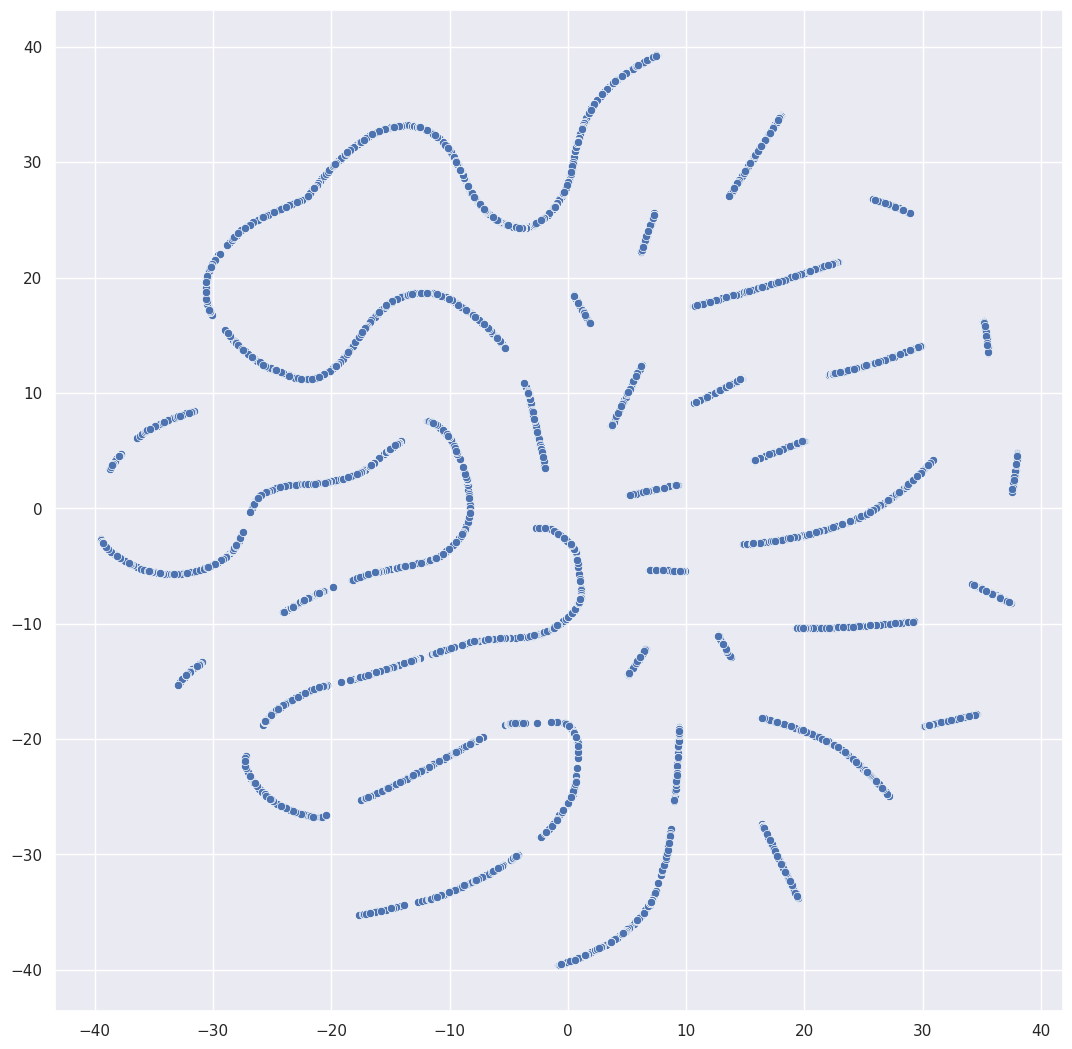

In [47]:
sns.scatterplot(x=df_pca_tsne_reduced[:, 0], y=df_pca_tsne_reduced[:, 1])

In [48]:
plt.show()

In [51]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

In [52]:
review_data_std = stats.zscore(df_pca_tsne_reduced)

In [53]:
review_data_std = np.array(review_data_std)

In [54]:
sns.set(rc={'figure.figsize': (7, 7)})

In [55]:
number_of_clusters = range(1, 20)

In [58]:
kmeans_models = [KMeans(n_clusters=i, max_iter=500, random_state=33) for i in number_of_clusters]


In [59]:
t0 = time.time()
scores = [-1 * model.fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced) for model in kmeans_models]
t1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

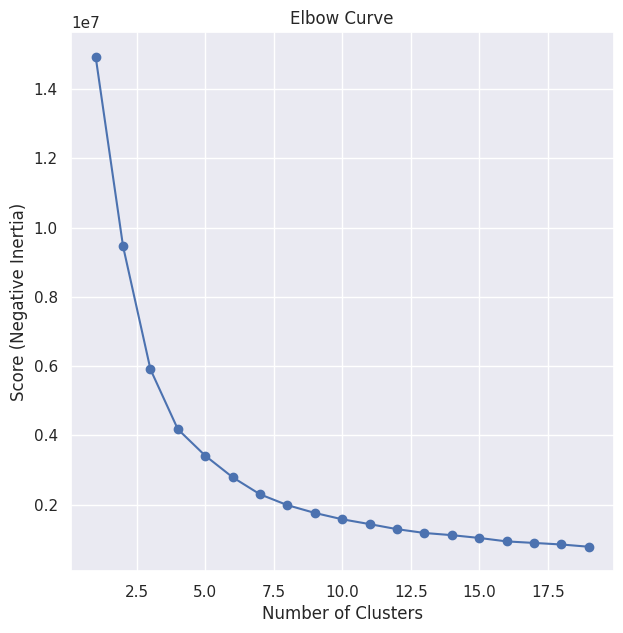

Plotting the Elbow curve took: 7.0s


In [61]:
plt.plot(number_of_clusters, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Negative Inertia)')
plt.title('Elbow Curve')
plt.show()
print("Plotting the Elbow curve took: {:.1f}s".format(t1 - t0))

In [63]:
k_means_test = KMeans(n_clusters=3, max_iter=1500, random_state=33,verbose=1)

#fitting on your model
-1*k_means_test.fit(df_pca_tsne_reduced).score(df_pca_tsne_reduced)
y_pred= k_means_test.labels_

# Assigning cluster labels to each data point
df_orig['klabels'] = k_means_test.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 8493482.0.
Iteration 1, inertia 6570487.0.
Iteration 2, inertia 6104636.0.
Iteration 3, inertia 5989980.0.
Iteration 4, inertia 5972663.0.
Iteration 5, inertia 5971208.0.
Iteration 6, inertia 5970046.0.
Iteration 7, inertia 5967928.0.
Iteration 8, inertia 5965638.0.
Iteration 9, inertia 5961543.5.
Iteration 10, inertia 5950955.5.
Iteration 11, inertia 5946834.0.
Iteration 12, inertia 5945682.0.
Iteration 13, inertia 5944595.0.
Iteration 14, inertia 5943839.0.
Iteration 15, inertia 5942676.0.
Iteration 16, inertia 5941327.0.
Converged at iteration 16: center shift 0.011949595995247364 within tolerance 0.038099542236328124.
Initialization complete
Iteration 0, inertia 7998925.0.
Iteration 1, inertia 6558863.0.
Iteration 2, inertia 6081028.0.
Iteration 3, inertia 6003211.0.
Iteration 4, inertia 5999755.0.
Iteration 5, inertia 5999156.0.
Converged at iteration 5: center shift 0.007648420985788107 within tolerance 0.038099542236328124.
Initializa

In [64]:
# Analyzing
size_of_each_cluster= df_orig.groupby('klabels').size().reset_index()
size_of_each_cluster.columns = ['klabels','number_of_points']
size_of_each_cluster['percentage'] = (size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points']))*100

print(size_of_each_cluster)

   klabels  number_of_points  percentage
0        0              6734   34.353637
1        1              6254   31.904908
2        2              6614   33.741455


In [66]:
palette = sns.hls_palette(3, l=.4, s=.9)

In [67]:
sns.set(rc={'figure.figsize': (13, 13)})

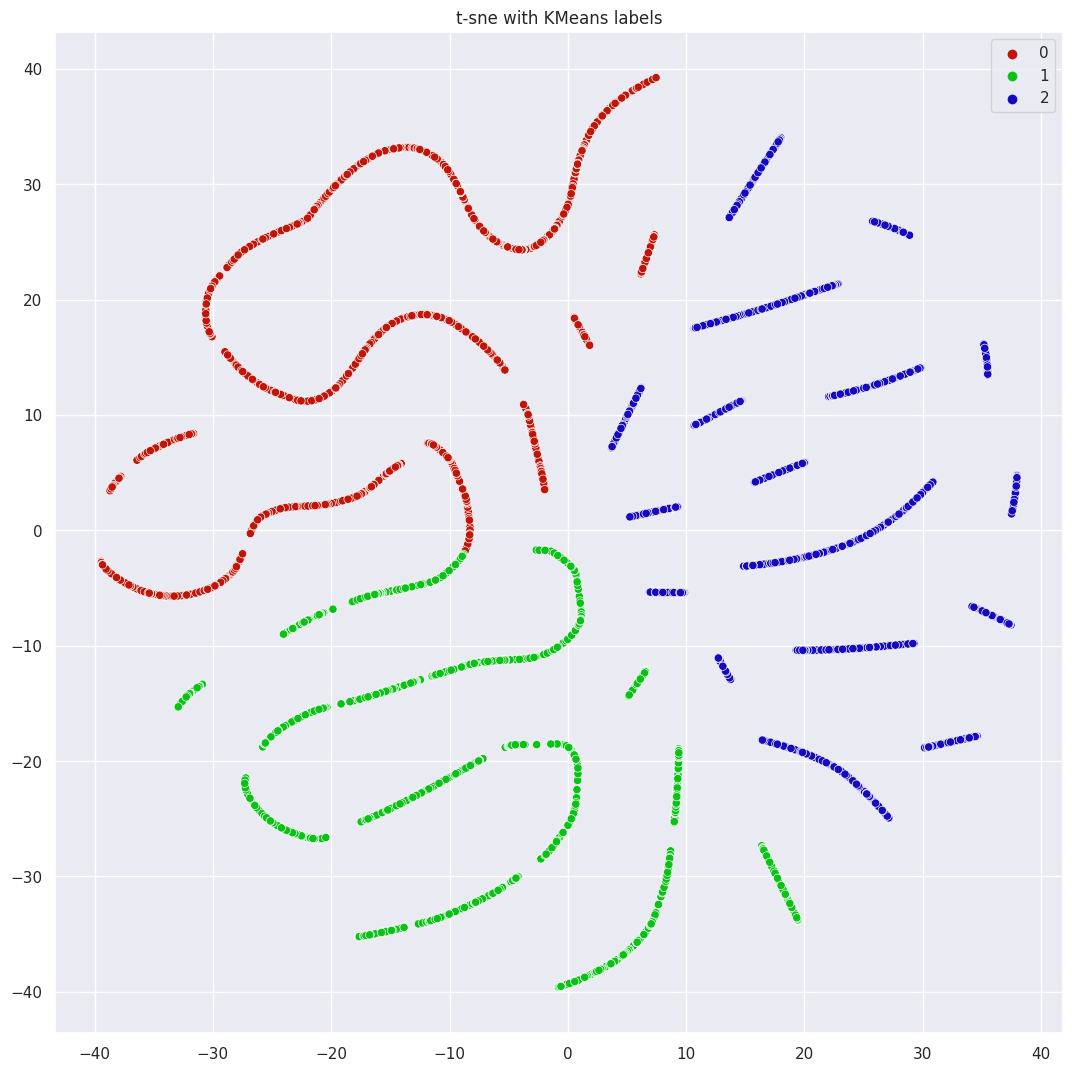

In [69]:
sns.scatterplot(x=df_pca_tsne_reduced[:, 0], y=df_pca_tsne_reduced[:, 1], hue=y_pred, legend='full', palette=palette)
plt.title("t-sne with KMeans labels")
plt.show()

In [70]:
def get_pos_tag(tag):
    """This function is used to get the part-of-speech(POS) for lemmatization"""

    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [71]:
import re
def preprocess(text):
    """ 1. Removes Punctuations
        2. Removes words smaller than 3 letters
        3. Converts into lowercase
        4. Lemmatizes words
        5. Removes Stopwords
    """
    punctuation= list(string.punctuation)
    doc_tokens= nltk.word_tokenize(text)
    word_tokens= [word.lower() for word in doc_tokens if not (word in punctuation or len(word)<=3)]

    # Lemmatize
    pos_tags=nltk.pos_tag(word_tokens)
#     print(pos_tags)
    doc_words=[wordnet_lemmatizer.lemmatize(word, pos=get_pos_tag(tag)) for word, tag in pos_tags]
    doc_words= [word for word in doc_words if word not in stoplist]

    return doc_words

df_clean = df_orig['Review_Text'].apply(preprocess)
df_clean.head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, stor...
2    [high, hope, dress, really, want, work, initia...
3    [love, love, love, jumpsuit, flirty, fabulous,...
4    [shirt, flatter, adjustable, front, perfect, l...
Name: Review_Text, dtype: object

In [72]:
common_terms= ["wear","look","ordered","color","purchase","order"]

stoplist= stoplist+ common_terms

In [73]:
# Tried multiple parts of speech and obtained best topic results using Nouns and Adjectives!
def get_nouns_adjs(series):

    " Topic Modeling using only nouns and adjectives"

    pos_tags= nltk.pos_tag(series)
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")]
    return all_adj_nouns

df_nouns_adj = df_clean.apply(get_nouns_adjs)

In [74]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import Phrases
from collections import Counter
from gensim.models import Word2Vec

In [75]:
docs= list(df_nouns_adj)
phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)

In [76]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(docs)

In [77]:
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

true_size >>>> 1136
size_small >>>> 626
look_great >>>> 621
order_size >>>> 557
size_size >>>> 457
usual_size >>>> 424
fabric_soft >>>> 346
many_compliment >>>> 311
soft_comfortable >>>> 307
love_dress >>>> 304
order_small >>>> 301
skinny_jean >>>> 301
regular_size >>>> 293
wear_size >>>> 275
material_soft >>>> 269
super_soft >>>> 260
dress_look >>>> 259
size_large >>>> 257
petite_size >>>> 255
fit_true >>>> 246


In [81]:
w2vmodel = Word2Vec(bigram_model[docs],  sg=1, hs=1, seed=33)


In [84]:
for key, counts in bigram_counter.most_common(30):
    print(key, ">>>>> ", counts)

In [86]:
print(key, ">>>>> ", counts)

fit_true >>>>>  246


In [88]:
similar_words = w2vmodel.wv.most_similar(positive=['pregnant'])

In [89]:
for word, score in similar_words:
    print(word, ":", score)

baby_bump : 0.7100266814231873
month_pregnant : 0.7098805904388428
pregnancy : 0.7073463201522827
maternity : 0.6996509432792664
billowy : 0.6854011416435242
sack : 0.682066023349762
hourglass_shape : 0.6744039058685303
nurse : 0.6492516994476318
waist/hips : 0.6418398022651672
potato_sack : 0.6400262117385864


In [90]:
w2vmodel.wv.most_similar(['work','white'], ['wedding'], topn=5)

[('crop', 0.5617029070854187),
 ('velvety', 0.5356240272521973),
 ('untucked', 0.5249497890472412),
 ('long-sleeved', 0.5248667001724243),
 ('wide-leg', 0.5238825678825378)]

In [91]:
w2vmodel.wv.most_similar(['price','steal'], ['discount'], topn=5)

[('value', 0.707294225692749),
 ('worth_price', 0.7006170153617859),
 ('sale_price', 0.6445338129997253),
 ('full_price', 0.6108736395835876),
 ('worth', 0.5967296361923218)]

In [92]:
w2vmodel.wv.most_similar(positive=["deal_breaker","quality"], negative=["worth_penny"], topn=3)

[('linen-like', 0.5728601813316345),
 ('sweater-like', 0.5606550574302673),
 ('bath', 0.5589113235473633)]

In [93]:
dictionary= Dictionary(data_words_bigrams)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1419
Number of documents: 19602


In [96]:
from gensim.models.ldamulticore import LdaMulticore

t0= time.time()
passes= 15
np.random.seed(1) # setting up random seed to get the same results
ldamodel= LdaMulticore(corpus,
                    id2word=dictionary,
                    num_topics=4,
#                   alpha='asymmetric',
                    chunksize= 4000,
                    batch= True,
                    minimum_probability=0.001,
                    iterations=50,
                    passes=passes)

t1= time.time()
print("time for",passes," passes: ",(t1-t0)," seconds")

time for 15  passes:  348.98554611206055  seconds


In [97]:
ldamodel.show_topics(num_words=25, formatted=False)

[(0,
  [('dress', 0.12696384),
   ('size', 0.022638759),
   ('wear', 0.017584594),
   ('perfect', 0.015689423),
   ('fabric', 0.013828291),
   ('comfortable', 0.01316605),
   ('great', 0.0129351085),
   ('petite', 0.012655242),
   ('look', 0.012009941),
   ('love', 0.011093012),
   ('color', 0.010511291),
   ('fit', 0.010442496),
   ('work', 0.009953333),
   ('waist', 0.009827584),
   ('flatter', 0.009712817),
   ('beautiful', 0.009506145),
   ('length', 0.009376447),
   ('summer', 0.009064835),
   ('material', 0.007655507),
   ('compliment', 0.0075949924),
   ('nice', 0.007059311),
   ('little', 0.006367268),
   ('cute', 0.0060280683),
   ('order', 0.005905024),
   ('small', 0.0057447595)]),
 (1,
  [('great', 0.03625717),
   ('jean', 0.024967548),
   ('wear', 0.023928061),
   ('color', 0.023490325),
   ('size', 0.02105359),
   ('look', 0.020300578),
   ('love', 0.018090477),
   ('pant', 0.014650467),
   ('order', 0.013437865),
   ('soft', 0.013407667),
   ('perfect', 0.013017786),
   

In [98]:
lda_corpus= ldamodel[corpus]

In [99]:
# Obtaining the main topic for each review:

all_topics = ldamodel.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr= gensim.matutils.corpus2csc(all_topics)
all_topics_numpy= all_topics_csr.T.toarray()

major_topic= [np.argmax(arr) for arr in all_topics_numpy]
df_orig['major_lda_topic']= major_topic

<Axes: >

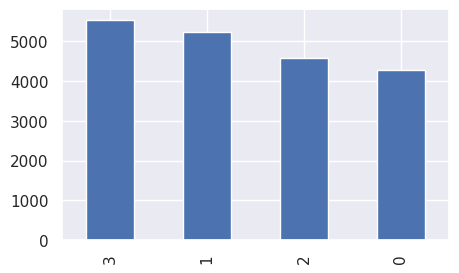

In [100]:
sns.set(rc= {'figure.figsize': (5,3)})
sns.set_style('darkgrid')

df_orig.major_lda_topic.value_counts().plot(kind='bar')

In [101]:
df_orig.groupby(['klabels'])['major_lda_topic'].value_counts(ascending=False, normalize=True)

klabels  major_lda_topic
0        3                  0.359370
         2                  0.291209
         1                  0.270419
         0                  0.079002
1        1                  0.337064
         0                  0.259034
         3                  0.210905
         2                  0.192996
2        0                  0.319474
         3                  0.271243
         2                  0.212428
         1                  0.196855
Name: major_lda_topic, dtype: float64

In [102]:
num_cols= ['Age','Positive_Feedback_Count','rev_word_count', 'unique_word_count','total_sentiment_score']

cat_cols= ['major_lda_topic','Division_Name','Department_Name','Class_Name']

cluster1= df_orig.loc[(df_orig.klabels==0)]
cluster2= df_orig.loc[(df_orig.klabels==1)]
cluster3= df_orig.loc[(df_orig.klabels==2)]

<Axes: >

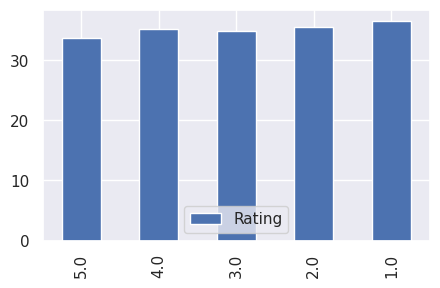

In [103]:
pd.DataFrame((cluster1.Rating.value_counts()*100)/df_orig.Rating.value_counts()).plot(kind='bar')

Visualizing numerical features:


<ipython-input-104-5438fa4784c0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster1[col])
<ipython-input-104-5438fa4784c0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster1[col])
<ipython-input-104-5438fa4784c0>:4: UserWarning: 

`distplot` is a deprecated function and will be rem

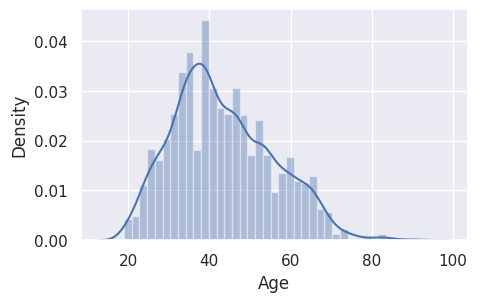

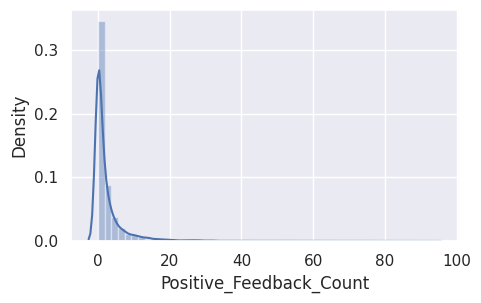

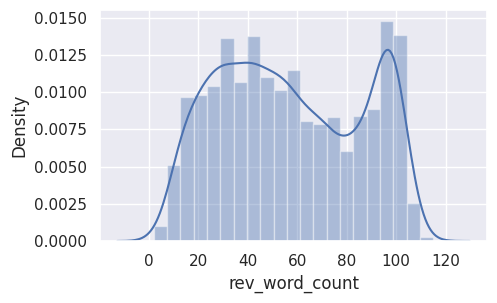

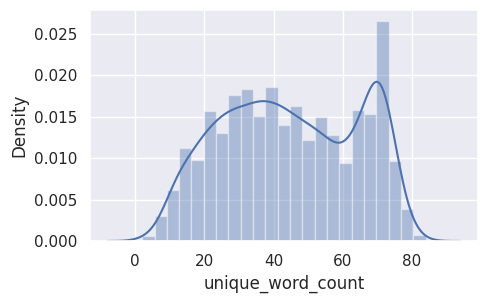

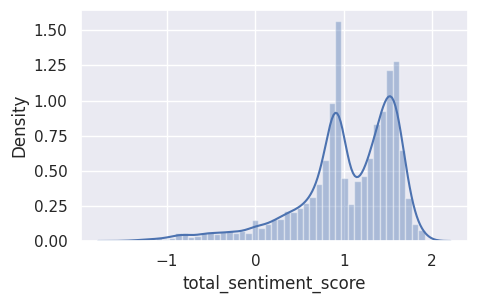

In [104]:

print('Visualizing numerical features:')
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(cluster1[col])

Visualizing categorical features:


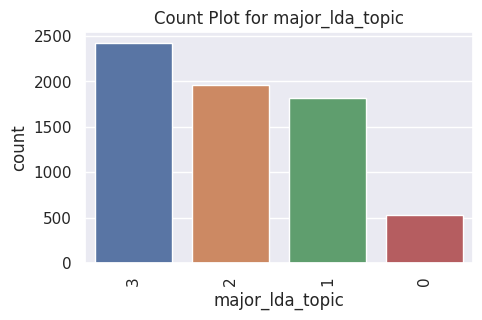

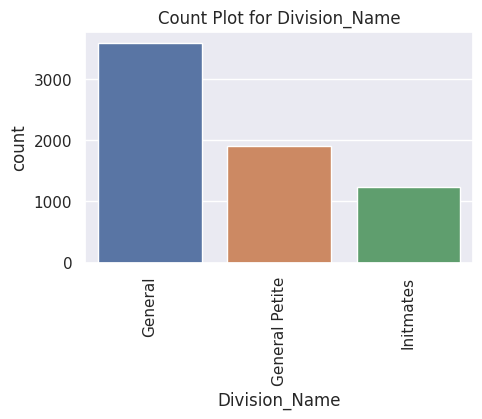

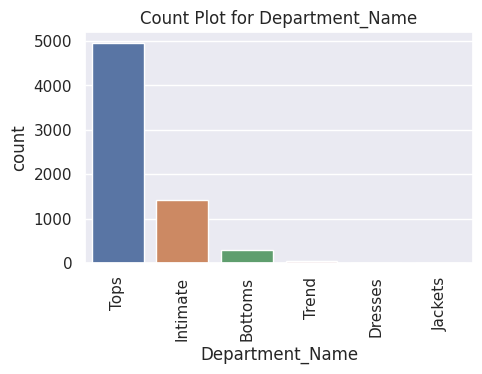

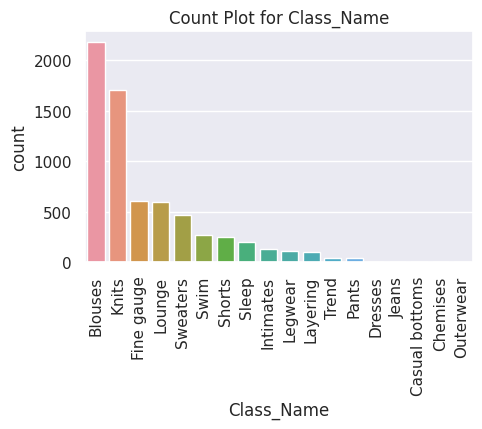

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Visualizing categorical features:')
for i, col in enumerate(cat_cols):
    plt.figure(i)
    chart = sns.countplot(data=cluster1, x=col, order=cluster1[col].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.title(f'Count Plot for {col}')
    plt.show()